# Importing libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
from sklearn import tree


# LoadDataset function

In [19]:
def loadDataset():
    dataset = datasets.load_iris()
    features = dataset.data
    labels = dataset.target
    return dataset, features, labels

# Prepare Dataset function

In [20]:
def prepareDataset (X, y):
    features = X
    labels = y
    return np.array(features)[:, 2:4], np.array(labels)

# Plot Regions function

In [21]:
def plotRegions(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[ 0], xlim[1])
    yy = np.linspace(ylim[ 0], ylim[1])
    XX, YY = np.meshgrid(xx, yy)
    z = np.vstack([XX.ravel(), YY.ravel()]).T
    ZZ = model.decision_function(z) .reshape(XX.shape)
    ax.contourf(XX, YY, ZZ, colors=[ 'c','y'], levels=0, alpha=0.2)

# Plot Data function

In [22]:
def plotData(features, labels, cls, class_names,class_act):
    colors = []
    markers = []
    for i in range(3):
        if(i==class_act):
            colors.append('b')
            markers.append('+')
        else:
            colors.append('k')
            markers.append('o')
            
    for class_index in range(len(cls)):
        plt.scatter(features[labels == cls[class_index], 0], features[labels ==cls[class_index], 1], c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])
    Title = "Iris Dataset with {n} classes" .format(n=int(len(cls)))
    plt.title(Title)
    plt.xlabel('Petal Length (cm)' )
    plt.ylabel('Petal width (cm)' )
    plt.legend()

# Comparing data plot function

In [23]:
def plotCompData(features, labels, cls, class_names):
    colors = ['r','g']
    markers = ['o','+']        
    for class_index in range(len(cls)):
        plt.scatter(features[labels == cls[class_index], 0], features[labels ==cls[class_index], 1], c=colors[class_index], marker=markers[class_index],label=class_names[cls[class_index]])
    Title = "Compare plot prediction and actual data"
    plt.title(Title)
    plt.xlabel('Petal Length (cm)' )
    plt.ylabel('Petal width (cm)' )
    plt.legend()

# Get Class Names function

In [24]:
def getClassNames (target_names):
    cls_all = {}
    for i, label in enumerate(target_names):
        cls_all[i] = label
    return cls_all

# Binarize data function

In [25]:
def binarize(labels,pv_class):
    result=[]
    for i in range(len(labels)):
        if(labels[i]==pv_class):
            result.append(1)
        else:
            result.append(-1)
    return result

# Logistic Regression function

In [26]:
def logisticreg(X,y,class_act):    
    y=binarize(y,class_act)
    clf = LogisticRegression(random_state=0,).fit(X, y)
    y_pred =clf.predict(X)
    y_proba = clf.predict_proba(X)
    return clf,clf.score(X, y)*100, confusion_matrix(y, y_pred),y_pred,y_proba

# Support vector  machine function

In [27]:
def suppvecmach(X,y,class_act):    
    y=binarize(y,class_act)
    clf = svm.SVC(decision_function_shape='ovo',probability=True).fit(X, y)
    y_pred = clf.predict(X)
    y_proba = clf.predict_proba(X)
    return clf,clf.score(X, y)*100, confusion_matrix(y, y_pred),y_pred,y_proba

# Performance function

In [28]:
def performance(y_predict):
    print('Confusion matrix\n')
    hm=sn.heatmap(confusion_matrix(y,y_predict), annot=True)
    plt.show()
    counter=0
    comp=[]
    for i in range(len(y)):
        if y[i]!=y_predict[i]:
            counter+=1
            comp.append(0)
        else:
            comp.append(1)

    comp=np.array(comp)

    plotCompData(X,comp,[0,1],['Wrong','Correct'])
    print('Score',(1-counter/len(y))*100,'%')

# Load dataset main

In [29]:
    dataset, features, labels = loadDataset()
    class_names = getClassNames(dataset.target_names)
    X, y = prepareDataset(features, labels)
    cls=[0,1,2]


# LogisticRegression main

Logistic regression with active class 0
Score 100.0 %
Confusion matrix 



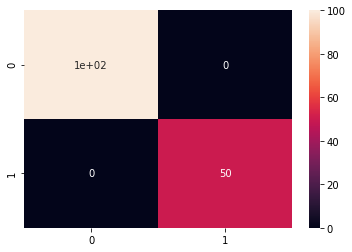

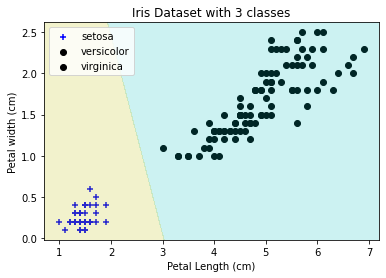

Logistic regression with active class 1
Score 60.0 %
Confusion matrix 



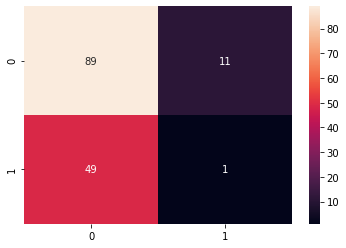

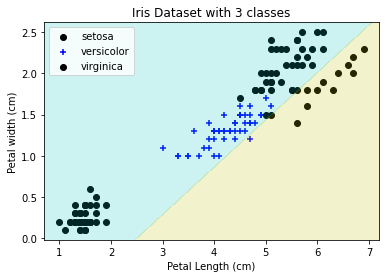

Logistic regression with active class 2
Score 96.66666666666667 %
Confusion matrix 



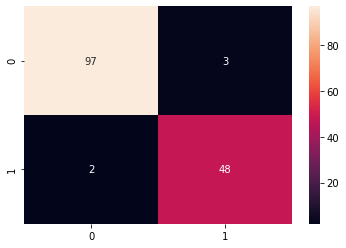

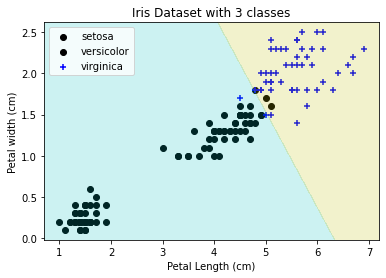

In [30]:
    import pandas as pd
    proba_array= []
    pred_array=[]
    clf_array=[]
    for i in range(0,3):
        print('Logistic regression with active class',i)
        model,score,con_mat,ynew,proba=logisticreg(X,y,i)    
        print('Score',score,'%')
        print('Confusion matrix \n')
        hm=sn.heatmap(con_mat, annot=True)
        plt.show()
        clf_array.append(model)
        p1=np.delete(proba,0,1).flatten()
        pred_array.append(ynew)
        proba_array.append(p1)
        plotData(X,y,cls,class_names,i)
        
        plotRegions(model)
        
        plt.show()


# argmax on logisticRegression 

Confusion matrix



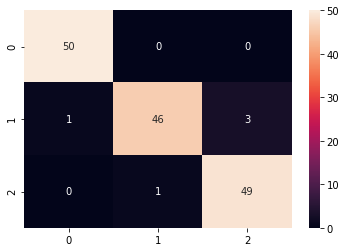

Score 96.66666666666667 %


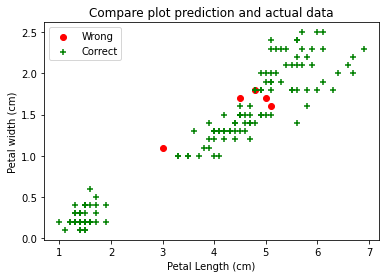

In [31]:
y_predict=np.argmax(proba_array,0)
performance(y_predict)

# VotingClassifier on LogisticRegression models

Confusion matrix



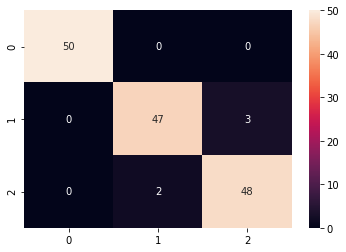

Score 96.66666666666667 %


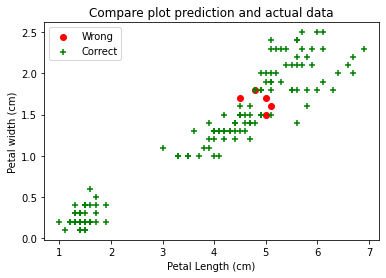

In [32]:
from sklearn.ensemble import VotingClassifier
clf1,clf2,clf3 = clf_array[0],clf_array[1],clf_array[2]
eclf1 = VotingClassifier(estimators=[
        ('c1', clf1), ('c2', clf2), ('c3', clf3)], voting='soft')
eclf1 = eclf1.fit(X, y)
performance(eclf1.predict(X))

# SupporVectorMachine Main

Support Vector Machine wirth active class 0
Score 100.0 %
Confusion matrix 



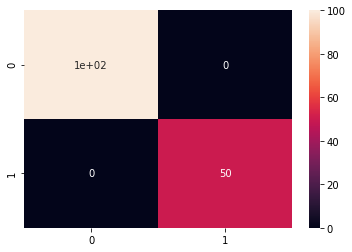

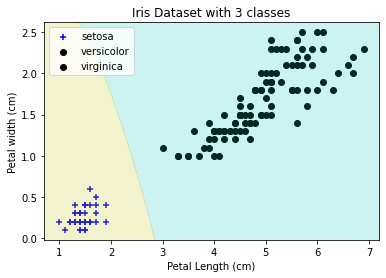

Support Vector Machine wirth active class 1
Score 95.33333333333334 %
Confusion matrix 



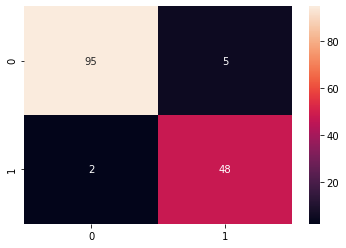

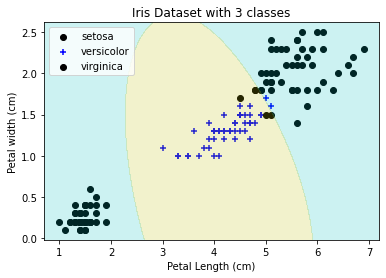

Support Vector Machine wirth active class 2
Score 95.33333333333334 %
Confusion matrix 



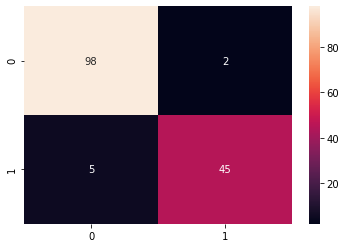

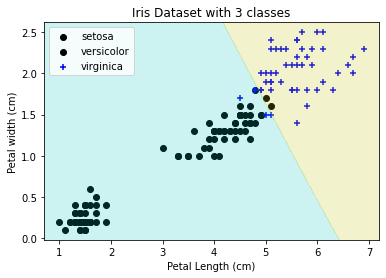

In [33]:
    proba_array= []
    clf_array=[]
    for i in range(0,3):
        print('Support Vector Machine wirth active class',i)
        model,score,con_mat,ynew,proba=suppvecmach(X,y,i)    
        print('Score',score,'%')
        print('Confusion matrix \n')
        hm=sn.heatmap(con_mat, annot=True)
        plt.show()
        clf_array.append(model)
        p1=np.delete(proba,0,1).flatten()        
        proba_array.append(p1)
        plotData(X,y,cls,class_names,i)
        plotRegions(model)
        plt.show()
        


# argmax on SupportVectorMachine

Confusion matrix



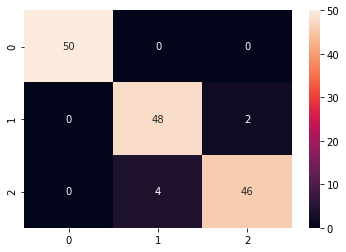

Score 96.0 %


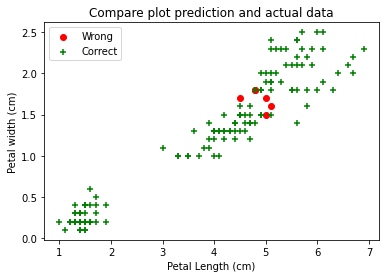

In [34]:
y_predict=np.argmax(proba_array,0)
performance(y_predict)

# VotingClassifier on SupportVectorMachine

Confusion matrix



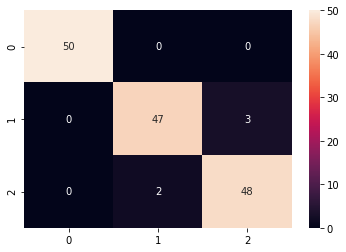

Score 96.66666666666667 %


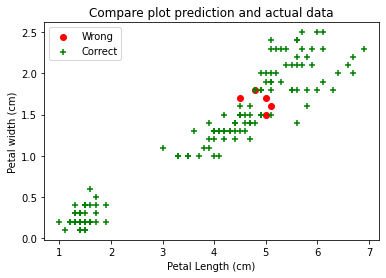

In [35]:
from sklearn.ensemble import VotingClassifier
clf1,clf2,clf3 = clf_array[0],clf_array[1],clf_array[2]
eclf1 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft',
       flatten_transform=True)
eclf1 = eclf1.fit(X, y)
performance(eclf1.predict(X))

# DecisionTreeClassifier

Confusion matrix



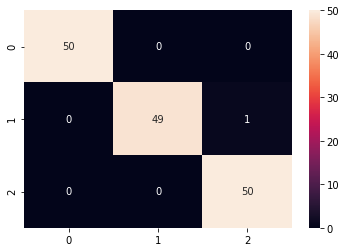

Score 99.33333333333333 %


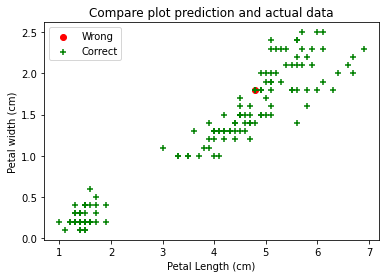

In [36]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
performance(clf.predict(X))

# DecissionTree on confidence propability

Confusion matrix



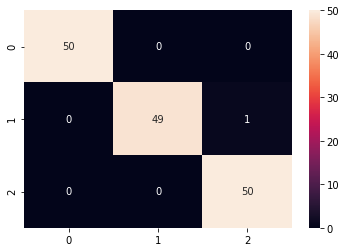

Score 99.33333333333333 %


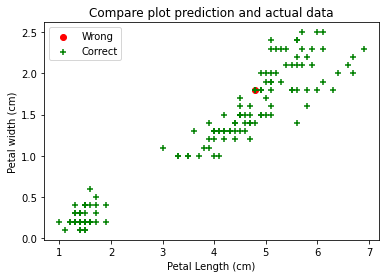

In [37]:
proba_t=np.array(proba_array).T
clf = tree.DecisionTreeClassifier()
clf = clf.fit(proba_t, y)
performance(clf.predict(proba_t))

**Using decision tree model on confidence probability from 3 classifiers to aggregate them.
giving higher score than using argmax because the way of decision tree dealing with probabilities better than returning maximum confidence only**